### Знайомство з задачею
Ваши коллеги из Навигатора собрали необходимые данные и прислали их в таком виде:
Зашифрованное наименование сети АЗС (столбец name): вместо брендов — названия растений;
Уникальный идентификатор конкретной АЗС (столбец id) — в сети их много;
Время заезда на АЗС (столбец date_time) в формате ISO: 20190405T165358 означает, что водитель прибыл на заправку 5 апреля 2019 года в 16 часов 53 минуты 58 секунд по UTC.
Проведённое на АЗС время (столбец time_spent) в секундах.
Нужно ответить на вопрос, сколько в среднем времени тратят водители на заправку в каждой из сетей АЗС.

Колеги прислали дані з назвами колонок:
    

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_csv('./data/visits.csv', sep='\t') # separator is tab
data.head()

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк
2,20180403T172824,76144fb2,220.0,Василёк
3,20180407T070441,76144fb2,19.0,Василёк
4,20180404T132049,76144fb2,14.0,Василёк


In [ ]:
data.info()

In [ ]:
data['date_time'] = pd.to_datetime(data['date_time'])   
data.info()

Скільки часу в середньому проводять автомобілі на заправці? (секунд)

In [43]:
pivot = data.pivot_table(index='name', values='time_spent', aggfunc='mean').reset_index()
pivot.sort_values(by='time_spent')

,name,time_spent
31,Нарцисс,68.166758
3,Арктотис,73.879984
29,Малопа,76.070543
27,Лобулярия,96.834350
8,Белоцветник,100.818966
17,Годеция,113.958333
22,Колокольчик,119.131564
33,Незабудка,120.362398
1,Амарант,132.760012
42,Фасоль,133.631957


Цікаво як на заправках Малопа, Арктотис і Нарцис заправляють машини за 1 хвилину? Треба перевірити дані на достовіність?

In [36]:
data.shape

(317104, 4)

In [35]:
total_visits = data['id'].count()
total_visits

np.int64(317104)

In [37]:
total_station = len(data['id'].unique())
total_station

471

In [38]:
data_min = data['date_time'].min()
data_max = data['date_time'].max()
data_min, data_max

(Timestamp('2018-04-02 00:00:08'), Timestamp('2018-04-08 23:59:57'))

In [39]:
days = (data_max - data_min)
days

Timedelta('6 days 23:59:49')

In [40]:
days = 7

In [41]:
station_visits_per_day = total_visits / days / total_station
station_visits_per_day

np.float64(96.17955717318775)

 ^^^^ ^^^^ ^^^^ ^^^^ \
 Маємо 96 заправок з ввімкненим навігатором в день на одну станцію. 


In [42]:
data_name = data['name'].value_counts().sort_values(ascending=False)
data_name.head(10)

name
Календула      85648
Василёк        79006
Георгина       34356
Немезия        20138
Колокольчик    18835
Мальва         17386
Гейхера        14125
Доротеантус     6312
Нарцисс         3640
Амарант         3221
Name: count, dtype: int64

 ^^^^ ^^^^ ^^^^ ^^^^ \
 Календула і Васільок є головними операторами ринку.\
\
Експерти підтвердили розподіл інших операторів як достовірний, тож вважаємо що з даними все добре. Але час заправки може бути порахований не вірно. 

In [47]:
data.time_spent.max()

np.float64(28925.0)

array([[<Axes: title={'center': 'time_spent'}>]], dtype=object)

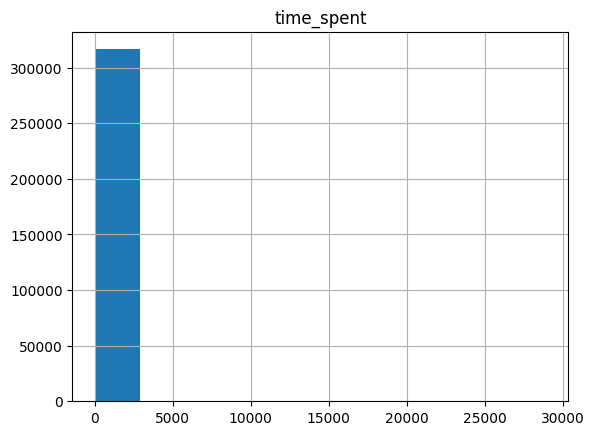

In [54]:
data.hist('time_spent')

array([[<Axes: title={'center': 'time_spent'}>]], dtype=object)

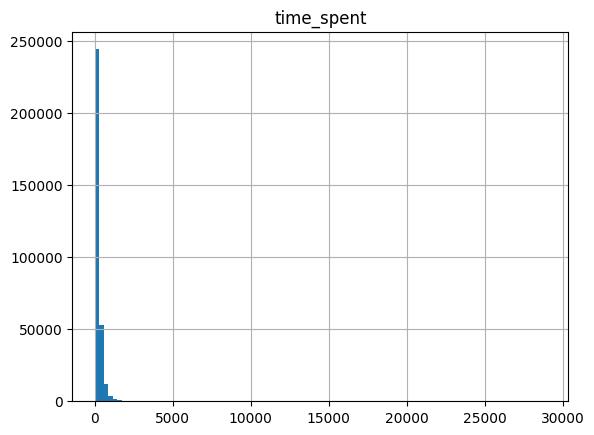

In [53]:
data.hist('time_spent', bins=100)

array([[<Axes: title={'center': 'time_spent'}>]], dtype=object)

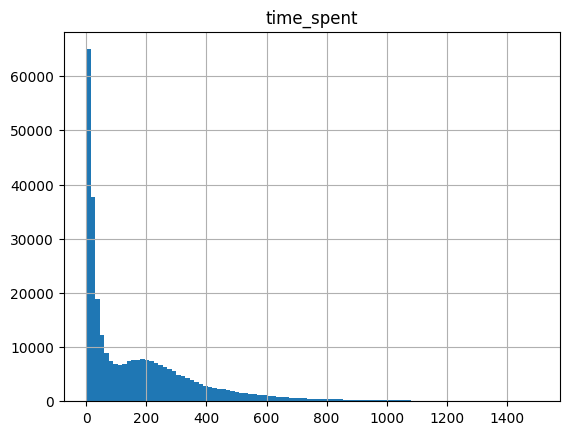

In [71]:

data.hist('time_spent', bins=100, range=(0, 1500))

Величезна кількість даних про час заправки, згрупована біля нуля. Такого бути не повинно. 

In [80]:
data.describe()

,date_time,time_spent
count,317104,317104.000000
mean,2018-04-05 13:35:49.178361088,203.382294
min,2018-04-02 00:00:08,0.000000
25%,2018-04-03 18:33:30.249999872,19.000000
50%,2018-04-05 14:38:10.500000,108.000000
75%,2018-04-07 07:56:25.750000128,274.000000
max,2018-04-08 23:59:57,28925.000000
std,NaN,395.754791


(-1000.0, 1000.0)

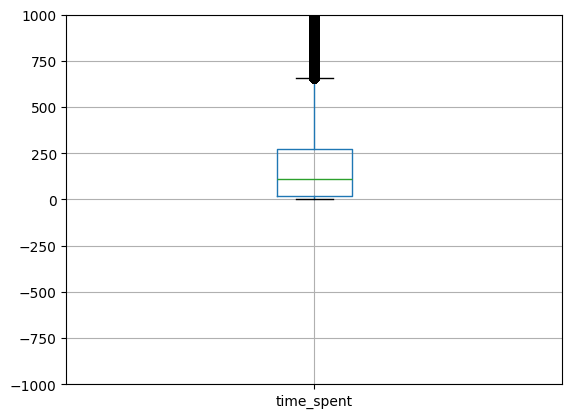

In [79]:
data.boxplot()
plt.ylim(-1000, 1000)